In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.express as px
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor

In [2]:
#dataset
df = pd.read_csv('Updated Data/updated_reviews_war.csv') #dataset that already been processed. 
df.head()

,reviews,subjects,ratings,titles
0,reminder evil perpetrate commit evil act nothing,Unique World War II story\n,10,Dara of Jasenovac
1,great movie Worth watch touching story depict ...,Must watch\n,10,Dara of Jasenovac
2,good movie real history fact Actore perfect well,Dara iz Jasenovca\n,10,Dara of Jasenovac
3,grandparent town Kozarska Dubicanear Jasenovac...,So true\n,10,Dara of Jasenovac
4,finally true come year silence hopefully world...,Finally true will come out\n,10,Dara of Jasenovac


In [3]:
sp = pd.read_csv('stopwords.csv')
sp.head()

,words
0,a
1,about
2,above
3,actual
4,after


In [4]:
df.shape

(8993, 4)

In [5]:
bool_list = pd.isnull(df["reviews"])

In [6]:
df[bool_list].shape

(18, 4)

In [7]:
df[bool_list]

,reviews,subjects,ratings,titles
604,NaN,👍👏👏👏👏👏👏👏👍👍👍👍👍👍👍👍👍👍👍👍👍\n,10,Dara of Jasenovac
5887,NaN,Parakram sahas shorya\n,10,Uri: The Surgical Strike
6350,NaN,It was much better than I expected\n,7,The Mountain II
6355,NaN,Pretty good flick. I get the 10/10 from the T...,0,The Mountain II
6358,NaN,"Overrated? YES, Bad movie? NO\n",6,The Mountain II
6362,NaN,The Mission\n,8,The Mountain II
6372,NaN,Great job!\n,10,The Mountain II
6377,NaN,A true disappointment.\n,4,The Mountain II
6389,NaN,"Must watchable, best film\n",8,The Mountain II
6390,NaN,Moving indeed\n,2,The Mountain II


In [8]:
df = df.dropna()

In [9]:
df.shape

(8975, 4)

In [10]:
fig = px.histogram(df, x="ratings")
fig.update_traces(marker_color="crimson",marker_line_color='rgb(8,4,8,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Total Movie Based on Ratings')
fig.show()

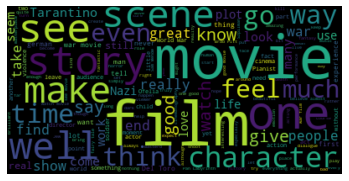

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stop_words = [w for w in sp.words]
stopwords.update(["and","the","or"])
#stopwords.update(["well","good","great","and","the","or"],stop_words)
textt = " ".join(review for review in df.reviews)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud1.png')
plt.show()

In [12]:
df['class'] = df['ratings'].apply(lambda rating : +1 if rating > 6 else (0 if (rating < 7 and rating > 4) else -1))
df['sentiment'] = df['ratings'].apply(lambda rating : "positive" if rating > 6 else ("neutral" if (rating < 7 and rating > 4) else "negative"))
df

,reviews,subjects,ratings,titles,class,sentiment
0,reminder evil perpetrate commit evil act nothing,Unique World War II story\n,10,Dara of Jasenovac,1,positive
1,great movie Worth watch touching story depict ...,Must watch\n,10,Dara of Jasenovac,1,positive
2,good movie real history fact Actore perfect well,Dara iz Jasenovca\n,10,Dara of Jasenovac,1,positive
3,grandparent town Kozarska Dubicanear Jasenovac...,So true\n,10,Dara of Jasenovac,1,positive
4,finally true come year silence hopefully world...,Finally true will come out\n,10,Dara of Jasenovac,1,positive
...,...,...,...,...,...,...
8988,laberinto del Fauno El DArk Fairy TaleSpain yo...,"Dark & Sad, but not Great!\n",7,Pan's Labyrinth,1,positive
8989,greeting darkness creatively warped mind write...,"Fairies, A Faun, A Frog and a Fussy Dandy\n",9,Pan's Labyrinth,1,positive
8990,one mention excellent film director call DEVIL...,will see this movie...\n,0,Pan's Labyrinth,-1,negative
8991,great film well worth see big screen fully app...,"Great film..however, not quite as good as The...",9,Pan's Labyrinth,1,positive


In [13]:
positive = df[df['class'] == 1]
neutral = df[df['class'] == 0]
negative = df[df['class'] == -1]

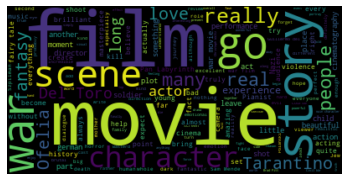

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["well","good","great","and","the","or"],stop_words) #unnecessary words
pos = " ".join(review for review in positive.reviews)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud2.png')
plt.show()

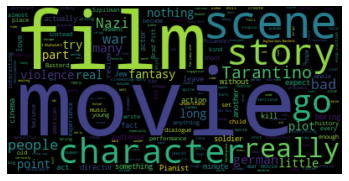

In [15]:
neg = " ".join(review for review in negative.reviews)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud3.png')
plt.show()

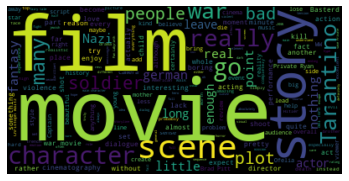

In [16]:
neu = " ".join(review for review in neutral.reviews)
wordcloud4 = WordCloud(stopwords=stopwords).generate(neu)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud4.png')
plt.show()

In [17]:
fig = px.histogram(df, x="sentiment")
fig.update_traces(marker_color="blue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [19]:
df = pd.DataFrame(df, columns = ["reviews","subjects","ratings","titles","class","sentiment"])
df.to_csv (r'C:\Users\User\Downloads\Review\Sentiment Review\sentiment_war.csv', index=False, header=True)
print(df)

                                                reviews  \
0      reminder evil perpetrate commit evil act nothing   
1     great movie Worth watch touching story depict ...   
2      good movie real history fact Actore perfect well   
3     grandparent town Kozarska Dubicanear Jasenovac...   
4     finally true come year silence hopefully world...   
...                                                 ...   
8988  laberinto del Fauno El DArk Fairy TaleSpain yo...   
8989  greeting darkness creatively warped mind write...   
8990  one mention excellent film director call DEVIL...   
8991  great film well worth see big screen fully app...   
8992  not understand people rave Ivana Bacquero grea...   

                                               subjects  ratings  \
0                           Unique World War II story\n       10   
1                                          Must watch\n       10   
2                                   Dara iz Jasenovca\n       10   
3                  

# Logistic Regression

In [20]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.2]

In [21]:
# count vectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['reviews'])
test_matrix = vectorizer.transform(test['reviews'])

In [22]:
X_train = train_matrix
X_test = test_matrix
y_train = train['class']
y_test = test['class']

In [23]:
# Logistic Regression
lr = LogisticRegression()

In [24]:
lr.fit(X_train,y_train)

C:\Users\User\anaconda3\envs\andirian98\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [25]:
predictions = lr.predict(X_test)

In [26]:
# find accuracy, precision, recall:
new = np.asarray(y_test)

In [27]:
print(confusion_matrix(predictions,y_test))
print(classification_report(predictions,y_test))

[[ 516   51   78]
 [  42  200   38]
 [ 140   98 2639]]
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77       645
           0       0.57      0.71      0.64       280
           1       0.96      0.92      0.94      2877

    accuracy                           0.88      3802
   macro avg       0.76      0.81      0.78      3802
weighted avg       0.89      0.88      0.89      3802



# Support Vector Machine

In [28]:
svmclassifier = SVC(kernel='linear')
svmclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred = svmclassifier.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[ 523   56  119]
 [  62  217   70]
 [ 136   67 2552]]
              precision    recall  f1-score   support

          -1       0.73      0.75      0.74       698
           0       0.64      0.62      0.63       349
           1       0.93      0.93      0.93      2755

    accuracy                           0.87      3802
   macro avg       0.76      0.77      0.77      3802
weighted avg       0.87      0.87      0.87      3802



# Linear Regression

In [31]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)

1.0061334403616338


In [33]:
print(regressor.coef_)

[-0.59273471 -0.32614616 -0.50808654 ...  0.47595282  0.14806663
  0.23842008]


In [34]:
y_pred = regressor.predict(X_test)

In [35]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,1,1.000012
1,1,1.000008
2,1,0.999729
5,1,1.000004
7,1,1.002380
...,...,...
8980,-1,-1.000001
8983,1,-14.236495
8984,0,-7.033464
8985,0,-1.966008


In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4482466360453885
Mean Squared Error: 27.572915329046424
Root Mean Squared Error: 5.250991842409054


In [38]:
model = MultinomialNB().fit(X_train, y_train)

In [39]:
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8271962125197264


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

[[ 405    3  290]
 [  75   43  231]
 [  55    3 2697]]
              precision    recall  f1-score   support

          -1       0.76      0.58      0.66       698
           0       0.88      0.12      0.22       349
           1       0.84      0.98      0.90      2755

    accuracy                           0.83      3802
   macro avg       0.82      0.56      0.59      3802
weighted avg       0.83      0.83      0.79      3802



In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on tra/*/ng data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [45]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.
